In [36]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format',  '{:.2f}'.format)



In [5]:
df = pd.read_csv("Heart Attack Analysis/heart.csv")
df_copy = df.copy()
df_copy.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


## EDA

In [6]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
print(f'Shape     : {df_copy.shape}\n'
      f'Size      : {df_copy.size}\n' 
      f'Dimension : {df_copy.ndim}')

Shape     : (303, 14)
Size      : 4242
Dimension : 2


In [8]:
df_copy.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [9]:
df_copy.duplicated().sum()

1

In [10]:
df_copy.loc[df_copy.duplicated(keep=False), :]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
163,38,1,2,138,175,0,1,173,0,0.00,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.00,2,4,2,1


In [12]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.00,54.37,9.08,29.00,47.50,55.00,61.00,77.00
sex,303.00,0.68,0.47,0.00,0.00,1.00,1.00,1.00
cp,303.00,0.97,1.03,0.00,0.00,1.00,2.00,3.00
trtbps,303.00,131.62,17.54,94.00,120.00,130.00,140.00,200.00
chol,303.00,246.26,51.83,126.00,211.00,240.00,274.50,564.00
fbs,303.00,0.15,0.36,0.00,0.00,0.00,0.00,1.00
restecg,303.00,0.53,0.53,0.00,0.00,1.00,1.00,2.00
thalachh,303.00,149.65,22.91,71.00,133.50,153.00,166.00,202.00
exng,303.00,0.33,0.47,0.00,0.00,0.00,1.00,1.00
oldpeak,303.00,1.04,1.16,0.00,0.00,0.80,1.60,6.20


In [13]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [14]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
num_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13848\3806933408.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_copy,


Text(0.5, 1.0, 'Ratio of Sex')

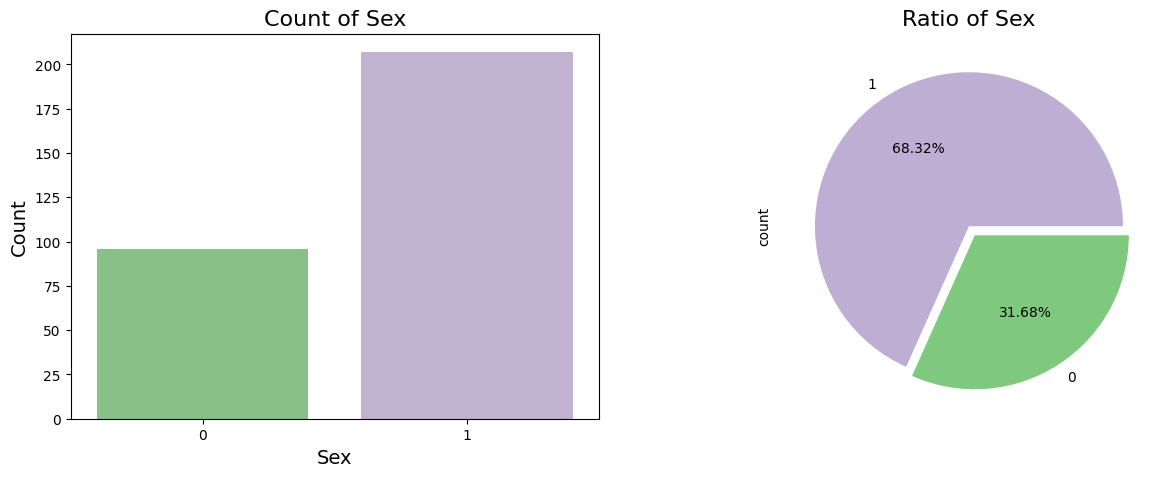

In [26]:
palette_color = sns.color_palette('Accent') 

fig, axs = plt.subplots(1,2, figsize = (15, 5))
ax = sns.countplot(data=df_copy, 
                   x=df_copy['sex'],
                   ax = axs[0], 
                   palette='Accent'
                   )

ax.set_xlabel('Sex', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
axs[0].set_title("Count of Sex", fontsize=16)

ax2 = df_copy['sex'].value_counts().plot.pie(explode=[0,0.07], 
                                             colors=[palette_color[1], palette_color[0]],
                                             ax = axs[1],
                                             autopct='%.2f%%')
axs[1].set_title("Ratio of Sex", fontsize=16)

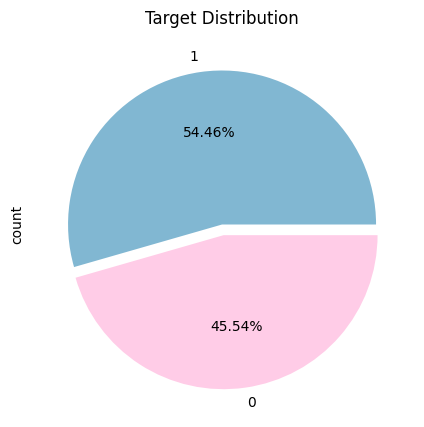

In [27]:
ax = df_copy['output'].value_counts().plot.pie(explode=[0,0.07], 
                                               colors=["#81b7d2", "#ffcce7"],
                                               autopct='%.2f%%',
                                               figsize=(15, 5))
ax.set_title('Target Distribution');

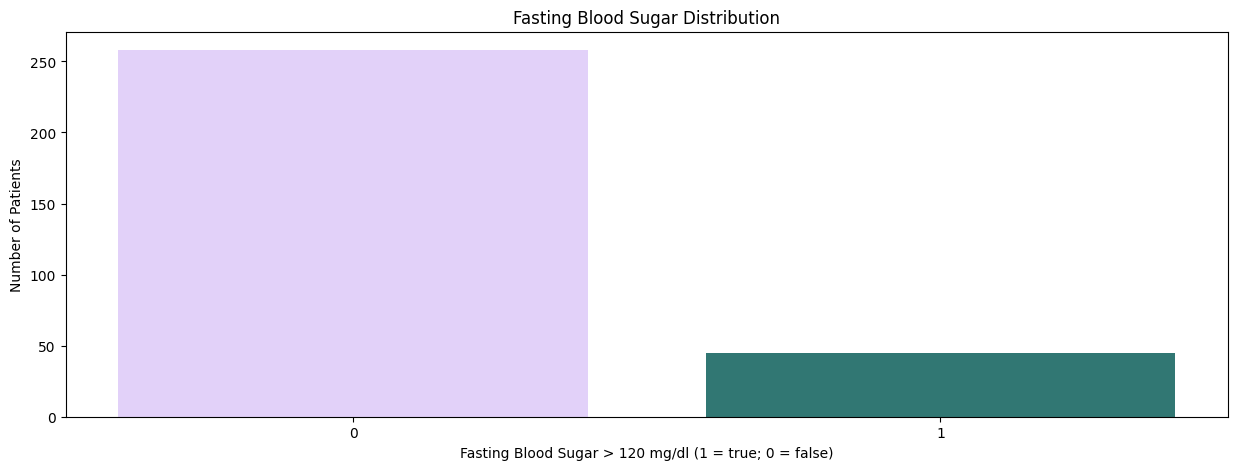

In [28]:
fbs_count = df['fbs'].value_counts()
plt.figure(figsize=(15,5))
plt.bar(fbs_count.index, fbs_count.values, color=["#E2D1F9", "#317773"])
plt.title('Fasting Blood Sugar Distribution')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false)')
plt.ylabel('Number of Patients')
plt.xticks(fbs_count.index)
plt.show()

([<matplotlib.axis.XTick at 0x1b1f47d7ca0>,
 [Text(0, 0, 'typical angina'),
  Text(1, 0, 'atypical angina'),
  Text(2, 0, 'non-anginal pain'),
  Text(3, 0, 'asymptomatic')])

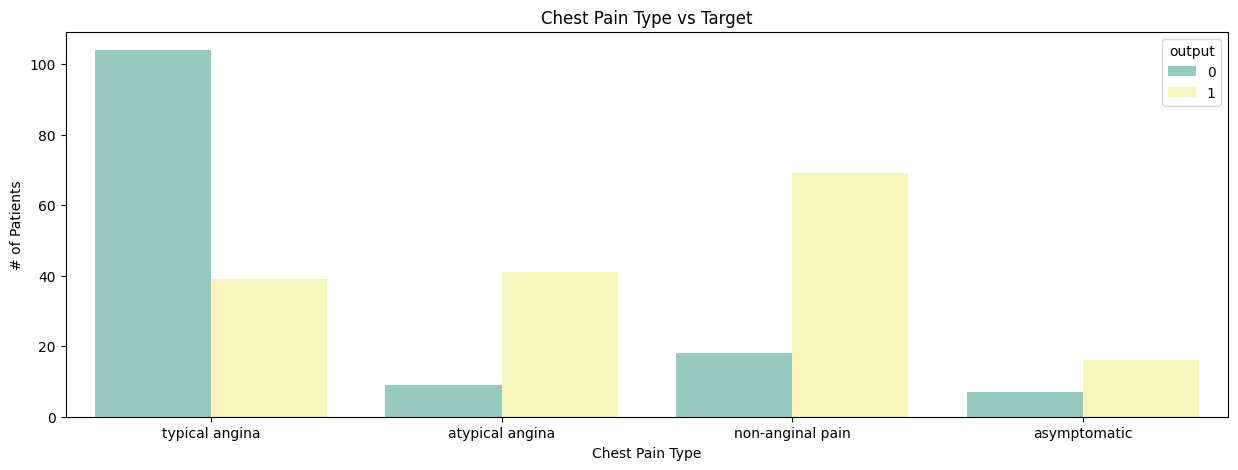

In [29]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_copy, 
              x='cp', 
              hue='output', 
              palette="Set3")
plt.title('Chest Pain Type vs Target')
plt.xlabel('Chest Pain Type')
plt.ylabel('# of Patients')
plt.xticks(ticks=[0,1,2,3], 
           labels=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'], rotation=0)

<Axes: >

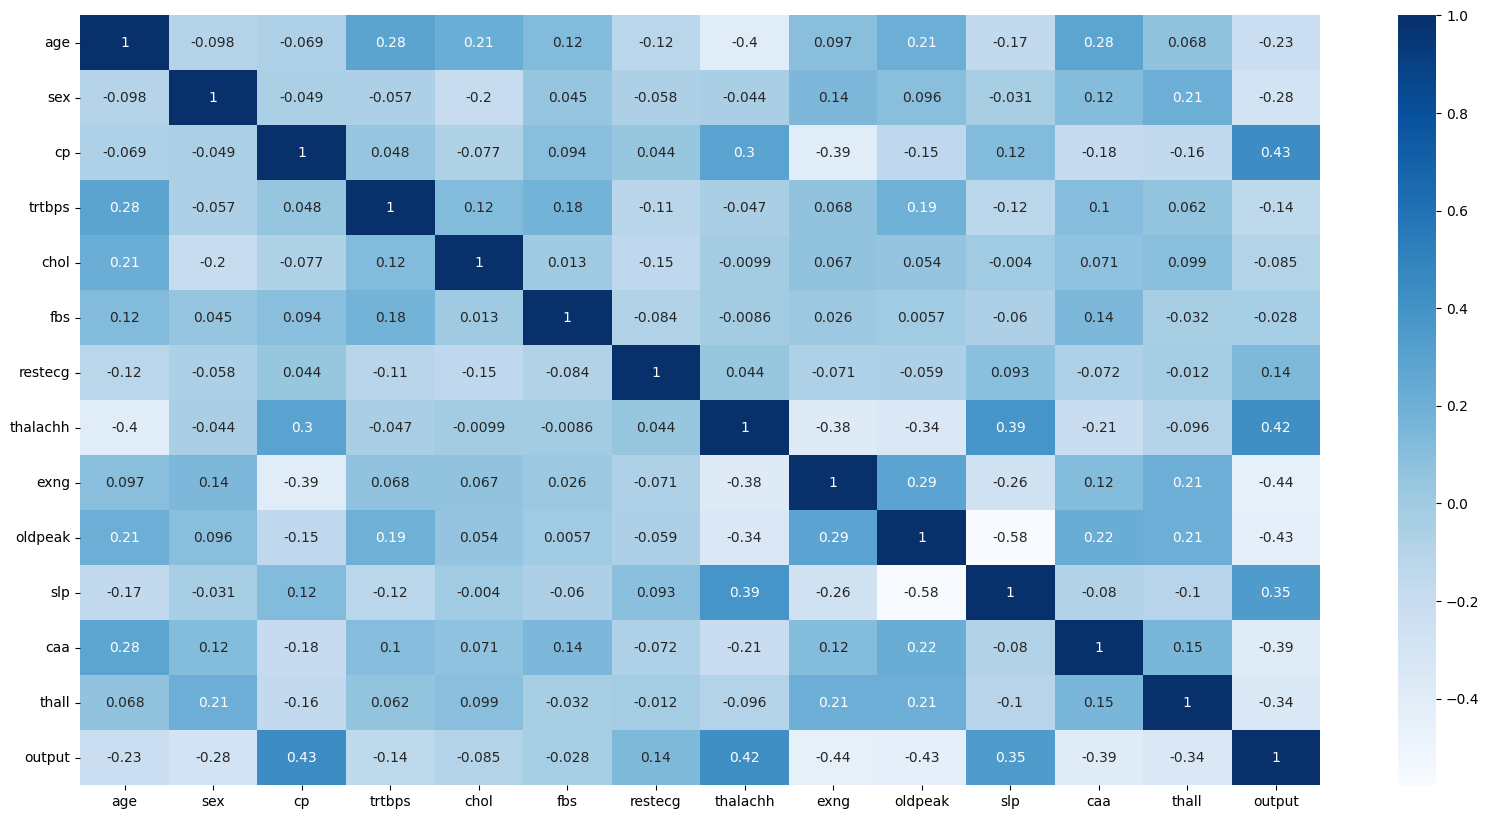

In [30]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="Blues", annot=True)

## Fetaure Engineering

In [32]:
# missing value
print(pd.concat([df_copy.isnull().sum(), df_copy.isnull().sum()/len(df_copy)*100],
                 keys=['Number of Missing Values', 'Ratio of Missing Values'],
                 axis=1))

          Number of Missing Values  Ratio of Missing Values
age                              0                     0.00
sex                              0                     0.00
cp                               0                     0.00
trtbps                           0                     0.00
chol                             0                     0.00
fbs                              0                     0.00
restecg                          0                     0.00
thalachh                         0                     0.00
exng                             0                     0.00
oldpeak                          0                     0.00
slp                              0                     0.00
caa                              0                     0.00
thall                            0                     0.00
output                           0                     0.00


In [33]:
def outlier_thresholds(df, col_name, low_quantile=0.25, up_quantile=0.75):
    Q1 = df[col_name].quantile(low_quantile)
    Q3 = df[col_name].quantile(up_quantile)
    IQR = Q3 - Q1
    low_limit = Q1 - 1.5 * IQR
    up_limit = Q3 + 1.5 * IQR
    return low_limit, up_limit

In [34]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [35]:
for col in num_cols:
    print(col, check_outlier(df_copy, col))

age False
trtbps True
chol True
thalachh True
oldpeak True


Text(0.5, 1.0, 'chol Violin')

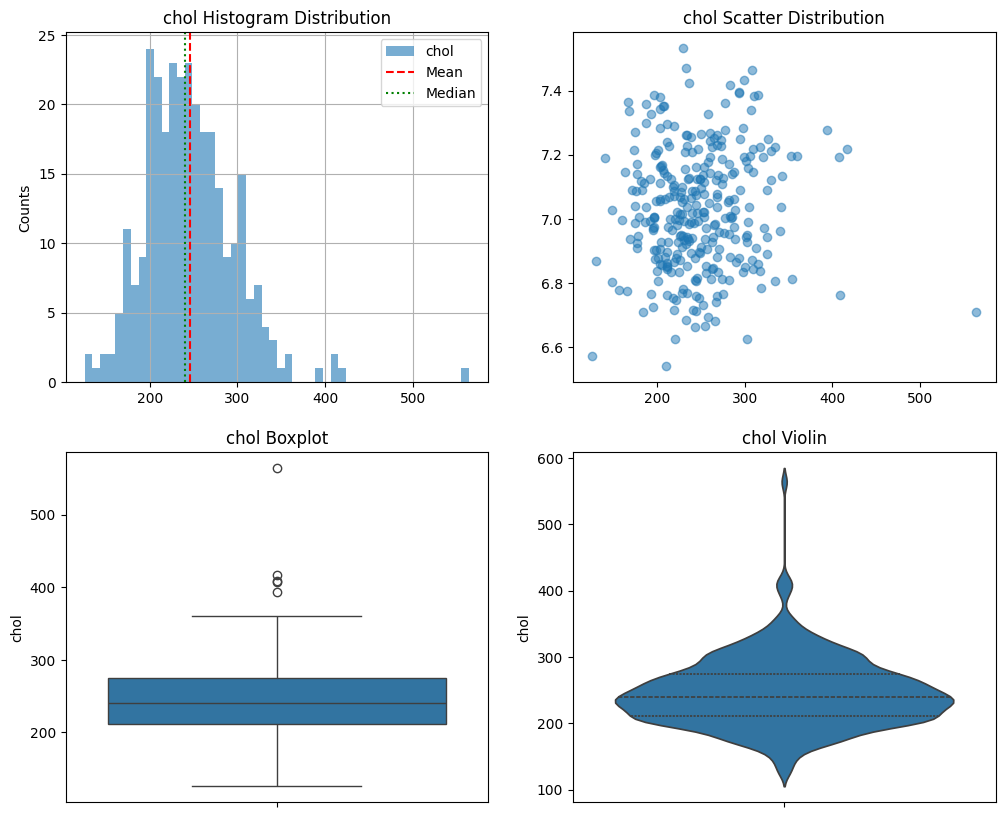

In [39]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
df_copy['chol'].hist(bins=50, label='chol', alpha=0.6)
plt.axvline(np.mean(df_copy['chol']), ls='--', c='r', label="Mean")
plt.axvline(np.median(df_copy['chol']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("chol Histogram Distribution")
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(df_copy['chol'], np.random.normal(7, 0.2, size=df_copy.shape[0]), alpha=0.5)
plt.title("chol Scatter Distribution")

plt.subplot(2, 2, 3)
sns.boxplot(y="chol", data=df_copy)
plt.title("chol Boxplot")

plt.subplot(2, 2, 4)
sns.violinplot(y="chol", data=df_copy, inner="quartile", bw_method=0.2)
plt.title("chol Violin")

In [40]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [41]:
for col in num_cols:
    print(col, replace_with_thresholds(df_copy, col))

age None
trtbps None
chol None
thalachh None
oldpeak None


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13848\1594510253.py:20: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(y="chol", data=df_copy, inner="quartile", bw=0.2)


Text(0.5, 1.0, 'chol Violin')

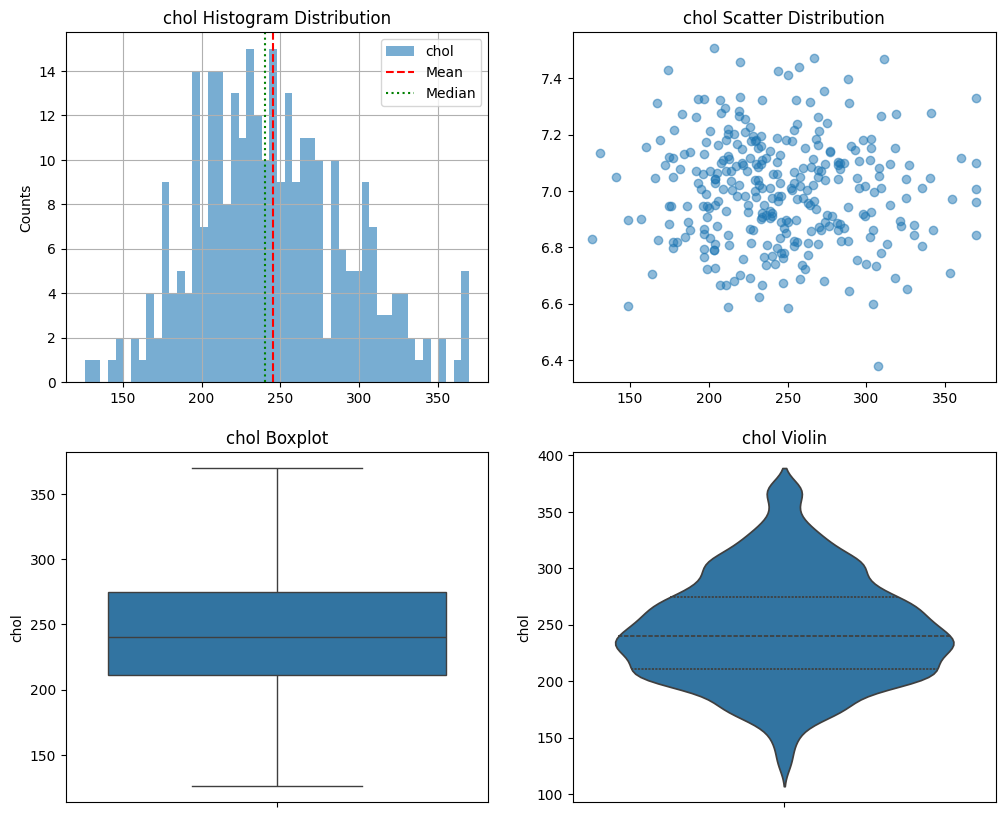

In [42]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
df_copy['chol'].hist(bins=50, label='chol', alpha=0.6)
plt.axvline(np.mean(df_copy['chol']), ls='--', c='r', label="Mean")
plt.axvline(np.median(df_copy['chol']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("chol Histogram Distribution")
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(df_copy['chol'], np.random.normal(7, 0.2, size=df_copy.shape[0]), alpha=0.5)
plt.title("chol Scatter Distribution")

plt.subplot(2, 2, 3)
sns.boxplot(y="chol", data=df_copy)
plt.title("chol Boxplot")

plt.subplot(2, 2, 4)
sns.violinplot(y="chol", data=df_copy, inner="quartile", bw=0.2)
plt.title("chol Violin")

Text(0.5, 1.0, 'chol Boxplot of Outlier Handled Data')

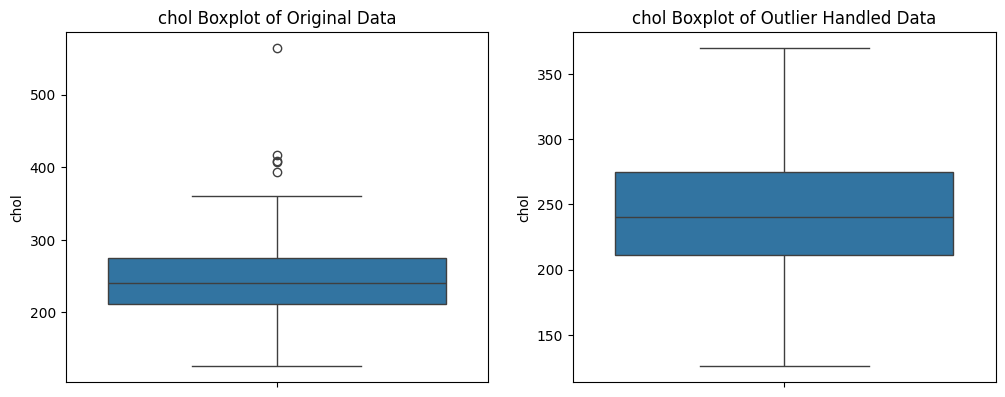

In [43]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.boxplot(y="chol", data=df)
plt.title("chol Boxplot of Original Data")

plt.subplot(2, 2, 2)
sns.boxplot(y="chol", data=df_copy)
plt.title("chol Boxplot of Outlier Handled Data")


In [44]:
df_copy['Age_CAT'] = pd.cut(x=df_copy['age'], 
                            bins=[20, 40, 60, df_copy['age'].max()], 
                            labels=["Adult", "Middle_Age_Adult", "Senior_Adult"])

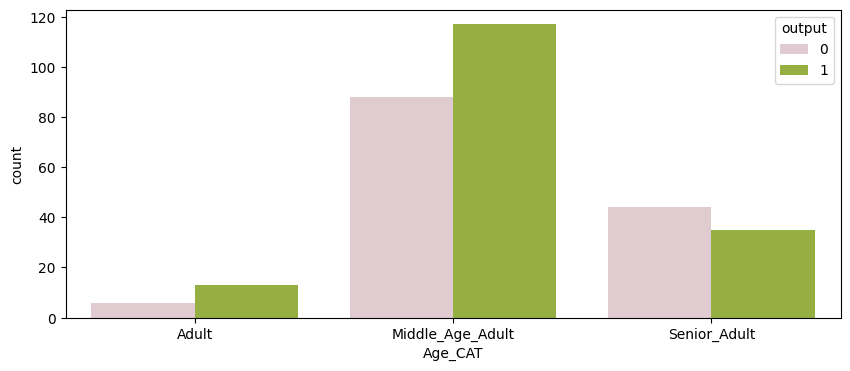

In [45]:
plt.figure(figsize=(10,4))
sns.countplot(data=df_copy, x='Age_CAT', 
              hue='output', 
              order=["Adult", "Middle_Age_Adult", "Senior_Adult"],
              palette=["#E3C9CEFF", "#9FC131FF"])
plt.show()

In [46]:
cat_cols.append('Age_CAT')
cat_cols

['sex',
 'cp',
 'fbs',
 'restecg',
 'exng',
 'slp',
 'caa',
 'thall',
 'output',
 'Age_CAT']

In [47]:
def one_hot_encoder(dataframe, categorical_col, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_col, drop_first=drop_first)
    return dataframe

ohe_cols = [col for col in df_copy.columns if 12 >= df_copy[col].nunique() > 2]
df_copy = one_hot_encoder(df_copy, ohe_cols, drop_first=True)

In [48]:
scaler = StandardScaler()
df_copy[num_cols] = scaler.fit_transform(df_copy[num_cols])

## Seleksi Model

In [49]:
y = df_copy["output"]
X = df_copy.drop("output", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [50]:
print('Shape of x_train is {}'.format(X_train.shape))
print('Shape of x_test is {}'.format(X_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train is (242, 24)
Shape of x_test is (61, 24)
Shape of y_train is (242,)
Shape of y_test is (61,)


In [51]:
models = [('LR', LogisticRegression(random_state=17, solver='lbfgs', max_iter=3000)),
          ('CART', DecisionTreeClassifier(random_state=17)),
          ('RF', RandomForestClassifier(random_state=17))
          ]

In [52]:
for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=['accuracy', 'f1', 'roc_auc', 'precision', 'recall'])
    print(f'########## {name} ##########')
    print(f'Accuracy: {round(cv_results["test_accuracy"].mean(), 4)}')
    print(f'Auc: {round(cv_results["test_roc_auc"].mean(), 4)}')
    print(f'Recall: {round(cv_results["test_recall"].mean(), 4)}')
    print(f'Precision: {round(cv_results["test_precision"].mean(), 4)}')
    print(f'F1: {round(cv_results["test_f1"].mean(), 4)}')

########## LR ##########
Accuracy: 0.858
Auc: 0.9218
Recall: 0.8901
Precision: 0.8594
F1: 0.8721
########## CART ##########
Accuracy: 0.7396
Auc: 0.7382
Recall: 0.7643
Precision: 0.766
F1: 0.7602
########## RF ##########
Accuracy: 0.7855
Auc: 0.8942
Recall: 0.8055
Precision: 0.8048
F1: 0.8024


[https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data]